In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.6MB/s 
     |████████████████████████████████| 10.1MB 59.2MB/s 
     |████████████████████████████████| 11.9MB 28.5MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=6c87acbfd0b844ec5f2f2b0da086cdb84edd66b9f1c504ae041990f63e9fdc03
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import geopandas as gpd
import os
import requests
import json
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#reading spatial data
data = gpd.read_file("gdrive/My Drive/osm_spatial_data.geojson")


In [6]:
data.head()

id             @id  ... smoking                   geometry
0  node/611105438  node/611105438  ...    None  POINT (77.21076 28.64056)
1  node/786590787  node/786590787  ...    None  POINT (77.21816 28.63152)
2  node/928550280  node/928550280  ...    None  POINT (77.21060 28.64070)
3  node/928558280  node/928558280  ...    None  POINT (77.21969 28.63509)
4  node/928558283  node/928558283  ...    None  POINT (77.22014 28.63510)

[5 rows x 81 columns]

In [7]:
data.columns

Index(['id', '@id', 'addr:street', 'amenity', 'name', 'cuisine',
       'outdoor_seating', 'tourism', 'shop', 'disused', 'fee', 'cmt',
       'description', 'ele', 'source', 'sym', 'addr:housename',
       'addr:housenumber', 'website', 'name:hi', 'operator', 'addr:place',
       'addr:postcode', 'opening_hours', 'wheelchair', 'addr:city', 'capacity',
       'phone', 'name:en', 'name:fr', 'name:es', 'note', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'clothes', 'level', 'name:ca',
       'diet:vegetarian', 'addr:unit', 'name:ru', 'fixme', 'name:ko',
       'name:kn', 'name:de', 'email', 'information', 'vending',
       'indoor_seating', 'toilets', 'barrier', 'bicycle', 'foot', 'horse',
       'motor_vehicle', 'toilets:disposal', 'access', 'branch', 'brand:short',
       'motorcycle:clothes', 'motorcycle:sales', 'female', 'clothes:men',
       'layer', 'short_name', 'name:he', 'motorcycle:repair', 'male',
       'alcohol', 'drink:beer', 'drink:vodka', 'drink:wine', 'internet_ac

In [0]:
coordinates = np.array([[data['geometry'].x,data['geometry'].y]])


In [9]:
!pip install folium

In [0]:

import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [0]:

#initiating the map with coordinates of nearby location to our data
mm = folium.Map([ 28.183180, 76.612228], zoom_start=4.4)  # nearby location coordinates initially


In [0]:
data['latitude']=data['geometry'].x
data['longitude']=data['geometry'].y

In [13]:

#Adding circular markers to map
for index, row in data.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=8,
                        popup=row['name'],
                        fill_color="r", # divvy color,
                       ).add_to(mm)
   
#plotting the data points on map
mm

In [0]:
mm.save("gdrive/My Drive/map_circular_marker.html")


In [15]:

#Setting the Map to show the data points in circular markers

for index, row in data.iterrows():
  folium.CircleMarker(location=(row['longitude'], row['latitude']),
                        radius= 10,
                                popup=row['name'], color='r',
                        fill_color='r').add_to(mm)
mm

In [16]:
map

map

In [17]:
stationArr = data[['latitude', 'longitude']].as_matrix()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
mm1 = folium.Map([ 28.183180, 76.612228], zoom_start=10)  # nearby location coordinates initially


In [19]:
# heatmap to our folium map to show the density of the data points is added
mm.add_child(plugins.HeatMap(stationArr, radius=13))
mm

In [20]:
locations = list(zip(data.longitude, data.latitude))

#Creating the icon for the data points
icons = [folium.Icon(icon="shop", prefix="fa") for _ in range(len(locations))]

cluster = MarkerCluster(locations=locations, icons=icons)
mm.add_child(cluster)
mm


In [21]:
mm

In [0]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#Standardising the data for fitting
coords= data[['latitude', 'longitude']]
coords = StandardScaler().fit_transform(coords)

db = DBSCAN(eps=0.3, min_samples=7).fit(coords)
labels = db.labels_
data["Market"]=labels



realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [23]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [0]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

Estimated number of clusters: 4
Estimated number of noise points: 57
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.451


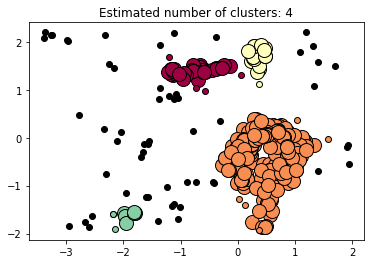

In [25]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data["Market"], labels))
print("Completeness: %0.3f" % metrics.completeness_score(data["Market"], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(data["Market"], labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(data["Market"], labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(data["Market"], labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(coords, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
mm
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = coords[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [0]:
#@title Default title text
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    folium.CircleMarker(location=(xy[:, 0], xy[:, 1]),
                        radius= 10,
                                popup=row['name'], color=tuple(col),
                        fill_color='k').add_to(mm)



    xy = coords[class_member_mask & ~core_samples_mask]

    folium.CircleMarker(location=(xy[:, 0], xy[:, 1]),
                        radius= 10,
                                popup=row['name'], color=tuple(col),
                        fill_color='k').add_to(mm)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()


In [0]:
mm.save("gdrive/My Drive/with_clusters.html")

In [30]:
mm